<a href="https://colab.research.google.com/github/BaruchMM/Relatividad-general-y-Cosmologia/blob/main/Ajuste_de_datos_de_supernova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 4 de Cosmología
###Baruch Mejía Martíez | mejiamb2018@licifug.ugto.mx

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from scipy.optimize import minimize


Obtenemos los datos de las supernovas de $\mu$ contra redshift.

In [7]:
data=np.loadtxt("/content/supernova_data.txt",usecols=(1,2,3)).T
sigma = data[2]

Graficamos los datos con su respectiva desviación estandar.

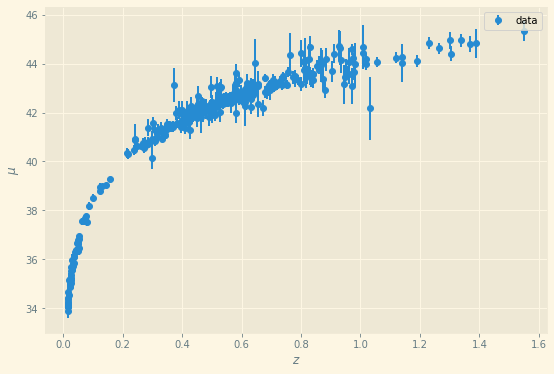

In [30]:
with plt.style.context('Solarize_Light2'):
  plt.figure(figsize=(9,6))
  plt.errorbar(data[0], data[1], yerr=sigma, fmt="o", label='data')
  plt.legend()
  plt.ylabel(r'$\mu$')
  plt.xlabel(r'$z$')
  plt.show()

Ya que queremos obtener los parámetros de densidad de materia y $\Lambda$ que mejor se ajusten a los datos, debemos definir una función a la que se le buscará el mejor ajuste.

Primero, sabemos que el modulo de distancia se define como
$$\mu = 5 \log_{10}\left(  \dfrac{d_L}{1 Mpc} \right)+25$$
Para obtener el valor de la distancia luminosa podemos usar la función 

```
FlatLambdaCDM(H0, Om0)
```
Aplicando la constricción de Friedman $\Omega_{m,0}+\Omega_{\Lambda,0}=1$, dejamos fijo el valor de $\Omega_{\Lambda,0}$, entonces $\Omega_{m,0}= 1-\Omega_{\Lambda,0}$. 

Entonces, extraemos el método luminosity_distance(z) para obtener la distancia luminosa para algún valor de $\Omega_\Lambda$ que mejor se ajuste y devolvemos el módulo de distáncia.


In [13]:
def distance_Modulus(z, olambda):
  cosmo =FlatLambdaCDM(H0=67.36, Om0=1. - olambda)
  DL = cosmo.luminosity_distance(z) 
  distanceModulus = 5 * np.log10(DL.value)+25
  return distanceModulus

Como se mencionó anteriormente, para hacer un ajuste de una curva a ciertos datos necesitamos una función a la cual se le hará el ajuste de sus parámetros para que se ajuste a los datos y los datos. Definimos una prueba de $\chi^2$ teniendo como valores esperados a los del modelo definido en la función distance_Modulus() y los valores observados como data[1].

In [22]:
def chi2(params):
  olambda=params[0]
  model   = distance_Modulus(data[0], olambda) 
  
  return  np.sum((data[1] - model)**2./data[2]**2) 

Usamos la función minimize de scipy.optimize en el test de $\chi^2$

In [21]:
res = minimize(chi2, x0=[0],method='L-BFGS-B', bounds=[(0,0.999)])
res

      fun: 331.2739590602862
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00161435])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 16
      nit: 5
   status: 0
  success: True
        x: array([0.60542241])

De aquí, obtenemos que el valor de $\Omega_\Lambda$ que mejor se ajusta al tiempo actual es:

```
x: array([0.60542241])
```



De modo que podemos obtener el valor de $\Omega_{m,0}$

In [ ]:
omega_m = 1-res.x[0]
omega_m

0.39442605867315417

Obtenemos $\Omega_{m,0} = 0.3944$ y $\Omega_{\Lambda,0} = 0.60557$

Calculamos los valores del modulo de distancia con este valor de $\Omega_\Lambda$

In [32]:
z=np.linspace(0.01,2,100)
mu = distance_Modulus(z,res.x[0])

Finalmente graficamos la curva de la función.

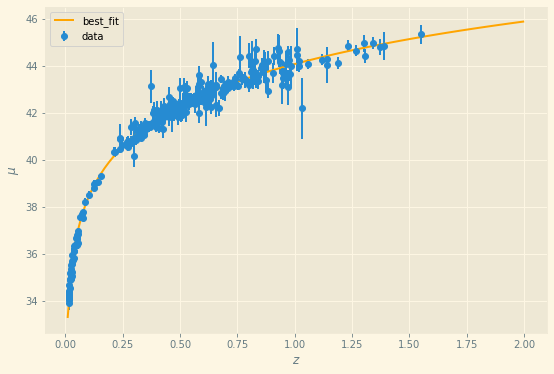

In [31]:
with plt.style.context('Solarize_Light2'):
  plt.figure(figsize=(9,6))
  plt.errorbar(data[0],data[1], yerr=sigma, fmt="o", label='data')
  plt.plot(z,mu, '-',color='orange', lw=2, label='best_fit')
  plt.legend()
  plt.ylabel(r'$\mu$')
  plt.xlabel(r'$z$')
  plt.show()